# Li-Daie-2016 - A DataJoint example
The data and results presented in this notebook pertain to the paper:

>Nuo Li, Kayvon Daie, Karel Svoboda & Shaul Druckmann. "Robust neuronal dynamics in premotor cortex during motor planning" (2016) Nature (https://dx.doi.org/10.1038/nature17643)

This notebook provide demonstrations of working with a DataJoint data pipeline in querying data, apply data conditioning and reproduce some key figures in the paper. The orignal data , in NWB 2.0 format, had been ingested into a DataJoint data pipeline (data pipeline schema is given below). As a validation of complete ingestion of the original data into DataJoint, figures 1e, 2c, and figures 1g, 2e will be reproduced in this example.

In [1]:
%matplotlib inline
import os
os.chdir('..')

In [2]:
import datajoint as dj
dj.conn().connect()

Connecting root@127.0.0.1:3306


In [3]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy import signal

from pipeline import lab, experiment, ephys, psth
from pipeline.plot import unit_characteristic_plot, unit_psth

In [4]:
import warnings
warnings.filterwarnings('ignore')

##  Firing rate change from control induced by photoinhibition for different task periods - Figure 1e

#### We first select a set of sample neurons
#### Using the built-in `plot_unit_psth`, plots of spike-raster and unit PSTH can be produced based on the selected units

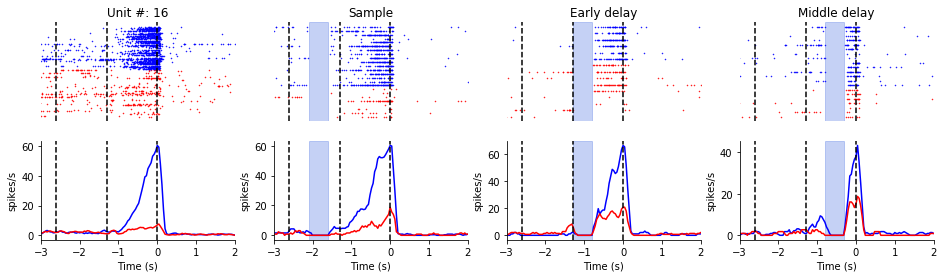

In [5]:
unit =  (ephys.Unit & {'subject_id': 255201, 'session': 6, 'unit': 16}).fetch1('KEY')
fig, axes = plt.subplots(2, 4, figsize=(16,4))
for axs, kw, title in zip(axes.T, (['good_noearlylick_', '_hit'], ['left_alm', 'sample'],
                          ['left_alm', 'early_delay'], ['left_alm', 'middle_delay']), 
                         ('', 'Sample', 'Early delay', 'Middle delay')):
    unit_psth.plot_unit_psth(unit, condition_name_kw=kw, axs=axs)
    if title:
        axs[0].set_title(title)

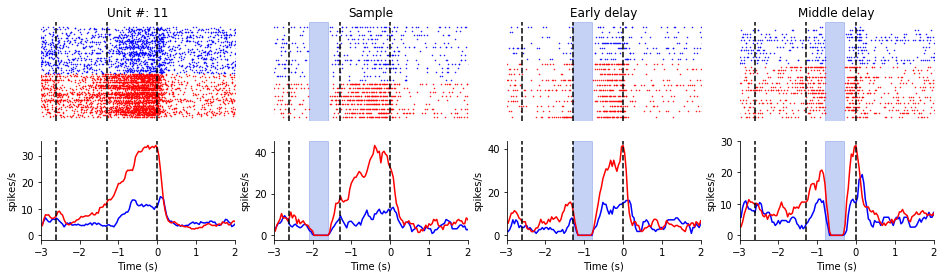

In [6]:
unit =  (ephys.Unit & {'subject_id': 255201, 'session': 5, 'unit': 11}).fetch1('KEY')
fig, axes = plt.subplots(2, 4, figsize=(16,4))
for axs, kw, title in zip(axes.T, (['good_noearlylick_', '_hit'], ['left_alm', 'sample'],
                          ['left_alm', 'early_delay'], ['left_alm', 'middle_delay']), 
                         ('', 'Sample', 'Early delay', 'Middle delay')):
    unit_psth.plot_unit_psth(unit, condition_name_kw=kw, axs=axs)
    if title:
        axs[0].set_title(title)

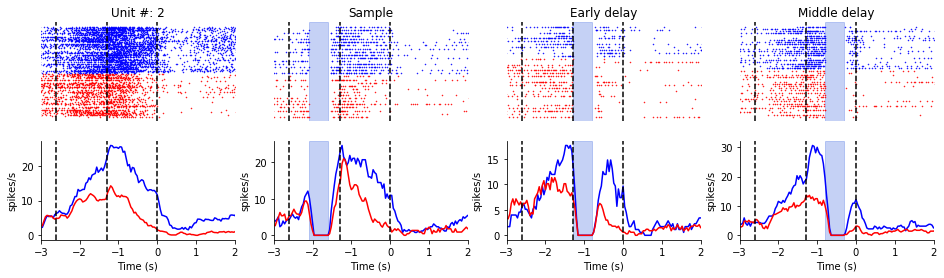

In [7]:
unit =  (ephys.Unit & {'subject_id': 255201, 'session': 5, 'unit': 2}).fetch1('KEY')
fig, axes = plt.subplots(2, 4, figsize=(16,4))
for axs, kw, title in zip(axes.T, (['good_noearlylick_', '_hit'], ['left_alm', 'sample'],
                          ['left_alm', 'early_delay'], ['left_alm', 'middle_delay']), 
                         ('', 'Sample', 'Early delay', 'Middle delay')):
    unit_psth.plot_unit_psth(unit, condition_name_kw=kw, axs=axs)
    if title:
        axs[0].set_title(title)

##  Firing rate change from control induced by photoinhibition for different task periods - for selective neurons - Figure 1g

### Select only left-ALM pyramidal units with selectivity in either sample or delay period

In [49]:
subjects = lab.Subject & [{'subject_id': 255200},
                          {'subject_id': 255203},
                          {'subject_id': 255201},
                          {'subject_id': 257772},
                          {'subject_id': 258250}]

In [50]:
units = (ephys.Unit * ephys.UnitCellType & subjects
         & (ephys.ProbeInsertion.InsertionLocation * experiment.BrainLocation
            & {'brain_area': 'ALM', 'hemisphere': 'left'})
         & 'cell_type = "Pyr"')

In [51]:
units = units & (psth.PeriodSelectivity & 'period in ("sample", "delay")' & 'period_selectivity !=  "non-selective"')

### Select trials:
+ control trials - left/right lick instruction
+ stim trials - 0.5s duration - sample period - left/right lick instruction
+ stim trials - 0.5s duration - early delay period - left/right lick instruction
+ stim trials - 0.5s duration - middle delay period - left/right lick instruction

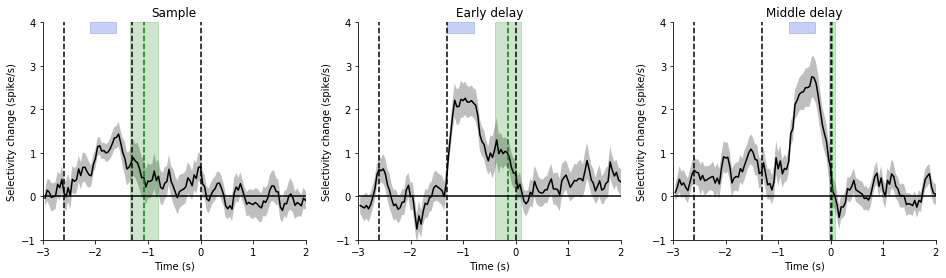

In [52]:
fig, axs = plt.subplots(1, 3, figsize=(16, 4))
unit_characteristic_plot.plot_selectivity_change_photostim_effect(units, ['left_alm_sample_0.5'], [-1.6, 1], ax=axs[0])
unit_characteristic_plot.plot_selectivity_change_photostim_effect(units, ['left_alm_early_delay_0.5'], [-.8, 1], ax=axs[1])
unit_characteristic_plot.plot_selectivity_change_photostim_effect(units, ['left_alm_middle_delay_0.5'], [-.3, 1], ax=axs[2])
for ax, title in zip(axs, ('Sample', 'Early delay', 'Middle delay')):
    ax.set_title(title)
    ax.set_ylim((-1, 4))
    ax.set_xlim(-3, 2)

## Firing rate change from control induced by left-right-bilateral photoinhibition - Figure 2c 
#### Under ALM photostim effect in `Early delay` at `Ipsilateral`, `Contralateral` and `Bilateral`

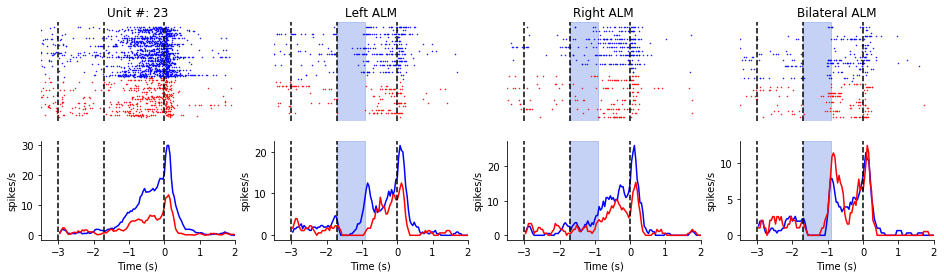

In [12]:
unit = (ephys.Unit & {'subject_id': 258250, 'session': 1, 'unit': 23}).fetch1('KEY')
fig, axes = plt.subplots(2, 4, figsize=(16,4))
for axs, kw, title in zip(axes.T, (['good_noearlylick_', '_hit'], ['left_alm', 'early_delay', '0.8'],
                          ['right_alm', 'early_delay', '0.8'], ['both_alm', 'early_delay', '0.8']), 
                         ('', 'Left ALM', 'Right ALM', 'Bilateral ALM')):
    unit_psth.plot_unit_psth(unit, condition_name_kw=kw, axs=axs, xlim=[-3.5, 2])
    if title:
        axs[0].set_title(title)

##  Firing rate change from control induced by photoinhibition at different brain regions - for selective neurons - Figure 2e

### Select only left-ALM pyramidal units with selectivity in either sample or delay period

In [53]:
subjects = lab.Subject & [{'subject_id': 255201},
                          {'subject_id': 257772},
                          {'subject_id': 258250},
                          {'subject_id': 257637},
                          {'subject_id': 264411},
                          {'subject_id': 263808},
                          {'subject_id': 263810}]

In [54]:
units = (ephys.Unit * ephys.UnitCellType & subjects
         & (ephys.ProbeInsertion.InsertionLocation * experiment.BrainLocation
            & {'brain_area': 'ALM', 'hemisphere': 'left'})
         & 'cell_type = "Pyr"')

In [55]:
units = units & (psth.PeriodSelectivity & 'period in ("sample", "delay")' & 'period_selectivity != "non-selective"')

### Select trials:
+ control trials - left/right lick instruction
+ stim trials - 0.8s duration - left ALM stim (ipsi) - early delay period - left/right lick instruction
+ stim trials - 0.8s duration - right ALM stim (contra) - early delay period - left/right lick instruction
+ stim trials - 0.8s duration - both ALM stim (bilateral) - early delay period - left/right lick instruction

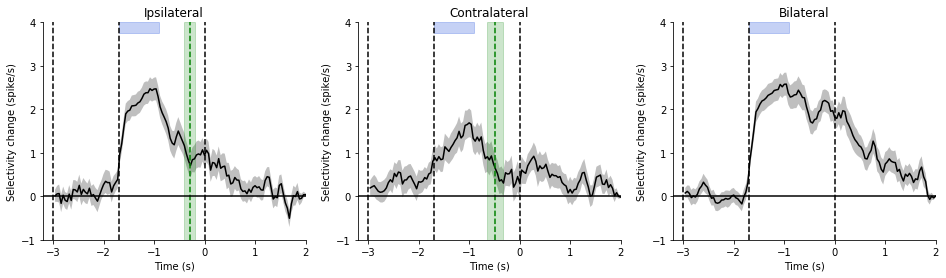

In [56]:
fig, axs = plt.subplots(1, 3, figsize=(16, 4))
unit_characteristic_plot.plot_selectivity_change_photostim_effect(units, ['left_alm_early_delay_0.8'], [-.9, 0], ax=axs[0])
unit_characteristic_plot.plot_selectivity_change_photostim_effect(units, ['right_alm_early_delay_0.8'], [-.9, 0], ax=axs[1])
unit_characteristic_plot.plot_selectivity_change_photostim_effect(units, ['both_alm_early_delay_0.8'], ax=axs[2])
for ax, title in zip(axs, ('Ipsilateral', 'Contralateral', 'Bilateral')):
    ax.set_title(title)
    ax.set_ylim((-1, 4))
    ax.set_xlim(-3.2, 2)

### Plot more sample units 
#### Selecting units under left-ALM photostim effect in `Sample`, `Early delay` and `Middle delay`
#### And a random subset of these units are selected for plotting

In [57]:
subjects = lab.Subject & [{'subject_id': 255200},
                          {'subject_id': 255203},
                          {'subject_id': 255201},
                          {'subject_id': 257772},
                          {'subject_id': 258250}]
units = ephys.Unit & psth.UnitPsth & subjects

In [58]:
unit_keys = (units & experiment.PhotostimEvent).fetch('KEY')

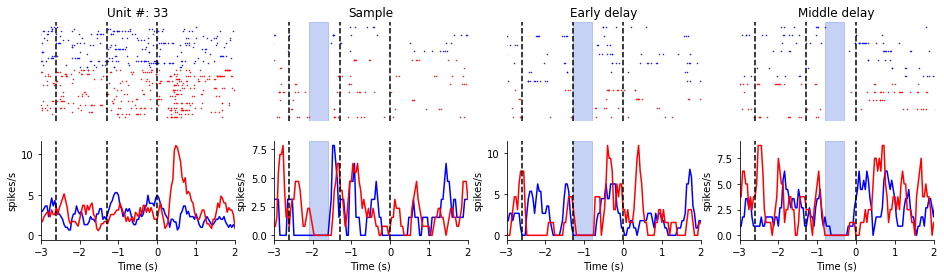

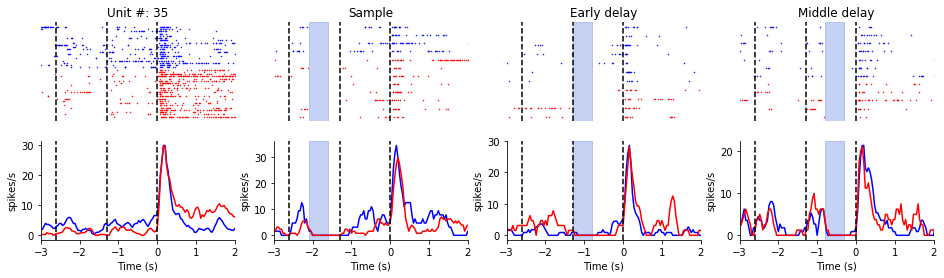

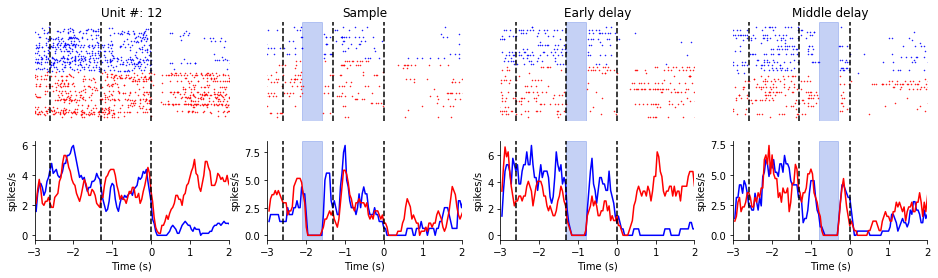

In [65]:
for unit in [unit_keys[k] for k in np.random.randint(len(unit_keys), size=(3,))]:
    fig, axes = plt.subplots(2, 4, figsize=(16,4))
    for axs, kw, title in zip(axes.T, (['good_noearlylick_', '_hit'], ['left_alm', 'sample', '0.5'],
                              ['left_alm', 'early_delay', '0.5'], ['left_alm', 'middle_delay', '0.5']), 
                             ('', 'Sample', 'Early delay', 'Middle delay')):
        unit_psth.plot_unit_psth(unit, condition_name_kw=kw, axs=axs)
        if title:
            axs[0].set_title(title)

### Plot more sample units 
#### First, find the units from sessions that underwent photostim at `left`, `right`, and `bilateral` ALM
#### And a random subset of these units are selected for plotting

In [66]:
left_alm_stim_units = units.proj() & (experiment.Photostim * experiment.BrainLocation & 'brain_location_name = "left_alm"')
right_alm_stim_units = units.proj() & (experiment.Photostim * experiment.BrainLocation & 'brain_location_name = "right_alm"')
both_alm_stim_units = units.proj() & (experiment.Photostim * experiment.BrainLocation & 'brain_location_name = "both_alm"')

In [67]:
unit_keys = (left_alm_stim_units * right_alm_stim_units * both_alm_stim_units).fetch('KEY')

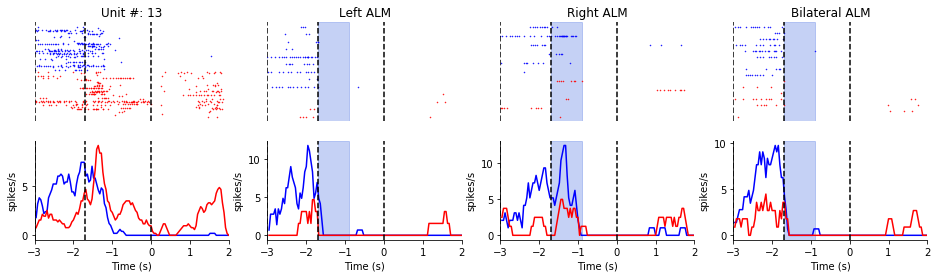

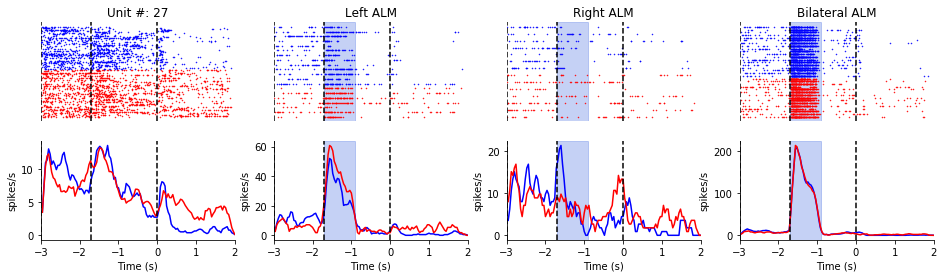

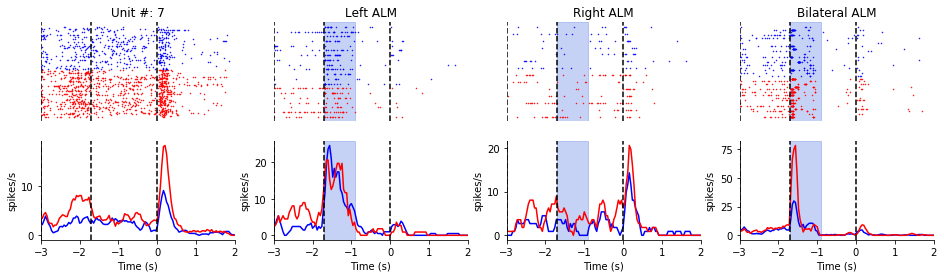

In [78]:
for unit in [unit_keys[k] for k in np.random.randint(len(unit_keys), size=(3,))]:
    fig, axes = plt.subplots(2, 4, figsize=(16,4))
    for axs, kw, title in zip(axes.T, (['good_noearlylick_', '_hit'], ['left_alm', 'early_delay', '0.8'],
                              ['right_alm', 'early_delay', '0.8'], ['both_alm', 'early_delay', '0.8']), 
                             ('', 'Left ALM', 'Right ALM', 'Bilateral ALM')):
        unit_psth.plot_unit_psth(unit, condition_name_kw=kw, axs=axs)
        if title:
            axs[0].set_title(title)

# Plot population PSTH - with selectivity
Here, we select units from the selected subjects that are from left ALM

In [60]:
units = units & (ephys.ProbeInsertion.InsertionLocation
                       * experiment.BrainLocation  & {'brain_area': 'ALM', 'hemisphere': 'left'})

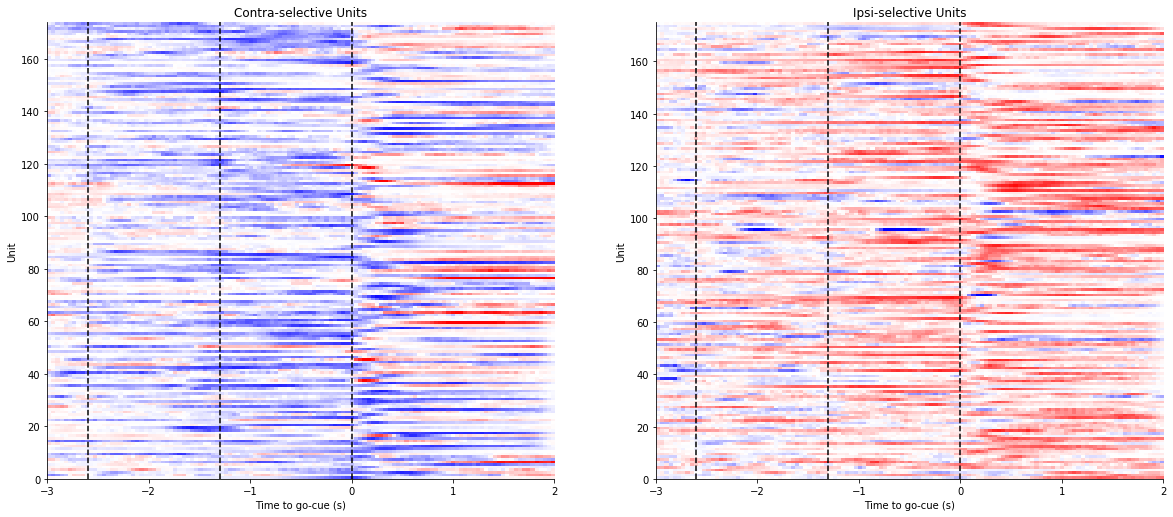

In [61]:
unit_characteristic_plot.plot_stacked_contra_ipsi_psth(units)

# =====================================================